In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"WELFake_Dataset.csv",index_col=0,nrows=10000)
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [3]:
df=df.dropna()

In [4]:
df_Class_1=[df['label']==1]
df_Class_0=[df['label']==0]


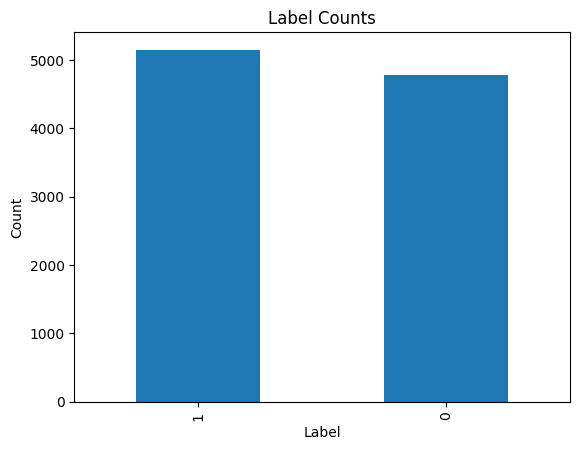

In [5]:
label_counts = df['label'].value_counts()
label_counts.plot(kind='bar')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')

plt.show()

In [6]:
X=df.drop('label',axis=1)
X.head()

,title,text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will..."
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...


In [7]:
y=df['label']
y.head()

0    1
2    1
3    0
4    1
5    1
Name: label, dtype: int64

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [9]:
#padding because the input size should be same for lstm and embedding
voc_size=10000

In [10]:
#one hot representation
messages=X.copy()
messages.reset_index(inplace=True)

In [11]:
import nltk
import re
from nltk.corpus import stopwords


In [12]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [45]:
##Data Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['text'][i])
    review=review.lower()
    review=review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)


In [48]:
corpus[5]

'dr ben carson tell stori happen spoke obama'

In [49]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr[5]

[3654, 5985, 8504, 458, 2359, 7060, 2873, 2740]

In [50]:
sent_length=500
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2359 8591 9399]
 [   0    0    0 ... 4049 1176 2085]
 [9455  833 9952 ... 4532 2559 9940]
 ...
 [8680 8775 7312 ... 1183 1786 1374]
 [   0    0    0 ... 3835 8361 9800]
 [2701 7469 2784 ... 7180 5417 6735]]


In [51]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0, 7556, 7609,  916, 2740,
       3914,  700,  162, 9143, 8361, 1789, 9750, 1055, 9164, 9089,  366,
       3545, 7549, 7589, 5135, 2575, 2551, 6885, 8542, 9770, 9164, 9089,
        366, 8885, 7189, 9770, 2757, 9089, 2477, 8775, 8442, 2667, 4253,
       1789, 6310, 7589, 1859, 5135, 5178, 2063, 1789, 6310, 8442, 7583,
       1541, 7589, 5135, 9591,  700, 8979, 3277, 8378, 5069, 5135, 9427,
       1997, 1789,  700, 7274,  805, 1363, 7610, 9164, 9591, 3277, 7589,
       1789, 6340,  700, 7589, 5135, 4526, 5069,  294, 6652, 5275, 5135,
       1087, 8426, 1789, 9750, 9770, 9164, 9089, 6366, 2671, 7589, 5135,
       3558,  856, 8591, 2063, 1176,  956, 3711, 3594, 7994,  688, 6478,
       8974, 9211, 6689, 7782,  700, 5434, 1789, 4956, 2757, 1300,  498,
       2060, 8442, 2847, 9617, 8442, 7583, 3711, 1183,  158, 9308, 2469,
       3532, 8775, 1183, 7159,  498, 5327,  688, 71

In [52]:
##Creating Model
from tensorflow.keras.layers import Dropout

embedding_vector_features=1000
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())


c:\Users\katiy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [53]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [54]:
X_final.shape,y_final.shape

((9927, 500), (9927,))

In [55]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=.25,random_state=42)

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=0)
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=100,callbacks=[es])

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 79s 997ms/step - accuracy: 0.7820 - loss: 0.4648 - val_accuracy: 0.9073 - val_loss: 0.2383
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 69s 921ms/step - accuracy: 0.9494 - loss: 0.1531 - val_accuracy: 0.8916 - val_loss: 0.2734
Epoch 2: early stopping


In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=model.predict(X_test)
X_test.shape

78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step


(2482, 500)

In [58]:
confusion_matrix(y_test,y_pred.round())

array([[1091,  117],
       [ 152, 1122]], dtype=int64)

In [59]:
accuracy_score(y_test,y_pred.round())

0.8916196615632555

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=20)

rf.fit(X_final,y_final)

RandomForestClassifier(max_depth=20)

In [64]:
rf_pred=rf.predict(X_test)

In [65]:
accuracy_score(rf_pred,y_test)

0.999597099113618

In [66]:
!pip install joblib

In [67]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')

print("Model saved successfully!")

Model saved successfully!
